Kelompok:
* Eka Kurnia Hidayat
* Steven Christ Pinantyo Arwidarasto
* Akbar Mujaddid 
* Muhammad Rifki
* Prevelia Adzani Vetian (Tidak berpartisipasi)


Kelas: Alfatih

Referensi:
* https://github.com/dennybritz/reinforcement-learning/blob/master/MC/MC%20Prediction%20Solution.ipynb
* https://towardsdatascience.com/optimizing-blackjack-strategy-through-monte-carlo-methods-cbb606e52d1b
* Sudharsan Ravichandiran - Hands-on Reinforcement Learning with Python. Master Reinforcement and Deep Reinforcement Learning using OpenAI Gym and TensorFlow-Packt (2018)

In [1]:
import numpy
import gym
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from functools import partial
%matplotlib inline
plt.style.use('ggplot')

> Pembuatan environment Blackjack using OpenAI GYM

In [2]:
## Inisialisasi environment Blackjack
env = gym.make('Blackjack-v0')

> Pendefinisian fungsi policy yang akan mengambil state sekarang dan mengecek skor bila lebih dari atau sama dengan 20, maka akan di return 0 sebaliknya akan di return 1

In [3]:
def policy(observation):
  score, dealer_score, usable_ace = observation
  return 0 if score >= 20 else 1

> Pembuatan episode yang berisi state, aksi, dan reward dengan menggunakan env.reset(), dan fungsi policy

> Setiap state, aksi, dan reward yang dilakukan dan didapat akan disimpan kedalam list state, aksi, reward (didapat dari env.step(aksi))

In [4]:
def episode(policy, env):
  states, actions, rewards = [], [], []
  observation = env.reset()
  while True:
    states.append(observation)
    action = policy(observation)
    actions.append(action)
    observation, reward, done, info = env.step(action)
    rewards.append(reward)
    if done:
      break
  return states, actions, rewards

> Penggunaan metode first-visit yang akan melakukan pengecekan nilai state, apakah nilai state tersebut telah dikunjungi sebelumnya. Bila sudah dikunjungi, maka akan ditingkatkan jumlah observasi N tambah 1 dan dihitung nilai value rata-ratanya

In [5]:
def first_visit(policy, env, n_episodes):
  value_table = defaultdict(float)
  N = defaultdict(int)
  
  for _ in range(n_episodes):
    states, actions, rewards = episode(policy, env)
    returns = 0
    for t in range(len(states) - 1, -1, -1):
      R = rewards[t]
      S = states[t]
      returns += R
      if S not in states[:t]:
        N[S] += 1
        value_table[S] += (returns - value_table[S]) / N[S]
  return value_table

In [6]:
value = first_visit(policy, env, 300000)
value

defaultdict(float,
            {(4, 1, False): -0.7008547008547008,
             (4, 2, False): -0.5284552845528455,
             (4, 3, False): -0.44000000000000006,
             (4, 4, False): -0.3571428571428572,
             (4, 5, False): -0.551470588235294,
             (4, 6, False): -0.4892086330935252,
             (4, 7, False): -0.4081632653061223,
             (4, 8, False): -0.43283582089552247,
             (4, 9, False): -0.3589743589743589,
             (4, 10, False): -0.5318761384335156,
             (5, 1, False): -0.6548042704626331,
             (5, 2, False): -0.5992509363295877,
             (5, 3, False): -0.5519713261648744,
             (5, 4, False): -0.5054545454545454,
             (5, 5, False): -0.4562043795620436,
             (5, 6, False): -0.54054054054054,
             (5, 7, False): -0.4926470588235295,
             (5, 8, False): -0.4689922480620154,
             (5, 9, False): -0.4701754385964913,
             (5, 10, False): -0.5246913580246918,


In [7]:
def plot_blackjack(V, ax1, ax2):
  player_sum = numpy.arange(12, 21 + 1)
  dealer_show = numpy.arange(1, 10 + 1)
  usable_ace = numpy.array([False, True])

  state_values = numpy.zeros((len(player_sum),len(dealer_show),len(usable_ace)))
  for i, player in enumerate(player_sum):
    for j, dealer in enumerate(dealer_show):
      for k, ace in enumerate(usable_ace):
        state_values[i, j, k] = V[player, dealer, ace]

  X, Y = numpy.meshgrid(player_sum, dealer_show)
  ax1.plot_wireframe(X, Y, state_values[:, :, 0])
  ax2.plot_wireframe(X, Y, state_values[:, :, 1])
  for ax in ax1, ax2:
    ax.set_zlim(-1, 1)
    ax.set_ylabel('player sum')
    ax.set_xlabel('dealer showing')
    ax.set_zlabel('state-value')

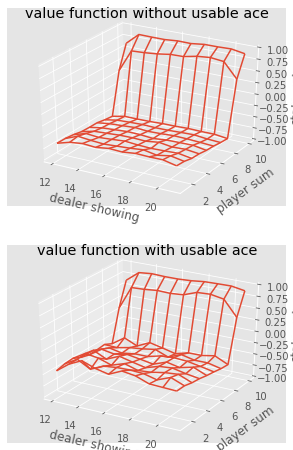

In [8]:
fig, axes = pyplot.subplots(nrows=2, figsize=(5, 8),
subplot_kw={'projection': '3d'})
axes[0].set_title('value function without usable ace')
axes[1].set_title('value function with usable ace')
plot_blackjack(value, axes[0], axes[1])